In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.constants import NUM_OF_SAMPLES, BASE_COLOR, COLOR_1, IMG
from constants import SCALING, GAUSS, BASELINE, NONE
from signal_transformation import add_baseline_wander, add_gaussian_noise, scale, dropout, vertical_flip, horizontal_flip, permutation
from data_augmentation import transform_signal

2023-02-14 15:06:16.781183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 15:06:17.599421: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 15:06:17.599451: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-14 15:06:18.914100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

<h2>Plot signal transformation</h2>

In [2]:
def plot_signal_transformation(original, transformed, transformation):
    x = np.arange(NUM_OF_SAMPLES)
    
    plt.plot(x, transformed, COLOR_1)
    plt.plot(x, original, BASE_COLOR)
    plt.legend([transformation, 'Original'])
    
    plt.xlim(1900, 2900)
    plt.ylim(-0.3, 0.8)
    
    plt.show()

<h2>Signal transformations</h2>

In [3]:
ecg_example = np.load('ecg_example.npy')
lead = 1 # lead II.
ecg_example_lead = ecg_example[lead]

<h3>Add Gaussian noise</h3>

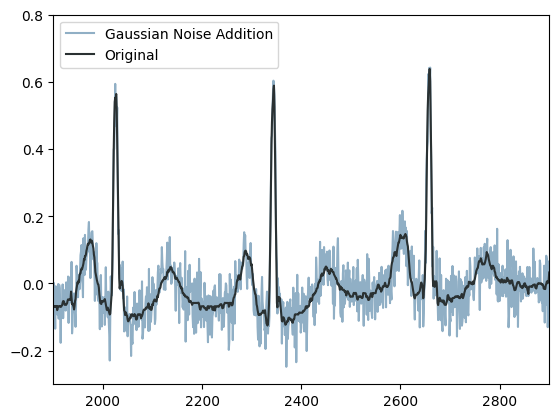

In [4]:
transformed = add_gaussian_noise(ecg_example_lead)
plot_signal_transformation(ecg_example_lead, transformed, 'Gaussian Noise Addition')

<h3>Add Baseline Wander</h3>

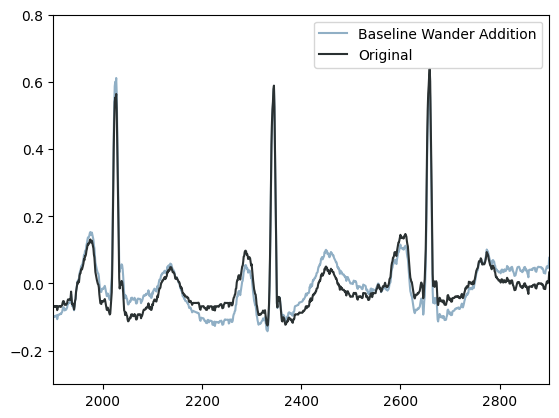

In [5]:
transformed = add_baseline_wander(ecg_example_lead)
plot_signal_transformation(ecg_example_lead, transformed, 'Baseline Wander Addition')

<h3>Scale</h3>

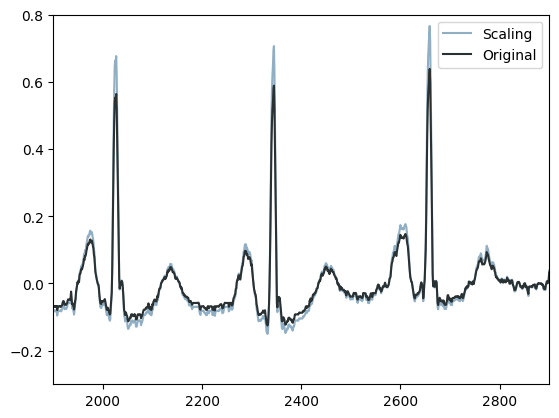

In [6]:
transformed = scale(ecg_example_lead)
plot_signal_transformation(ecg_example_lead, transformed, 'Scaling')

<h3>Dropout</h3>

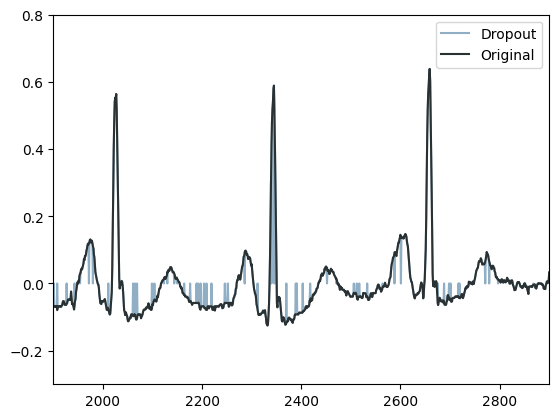

In [7]:
transformed = dropout(ecg_example_lead)
plot_signal_transformation(ecg_example_lead, transformed, 'Dropout')

<h3>Vertical Flip</h3>

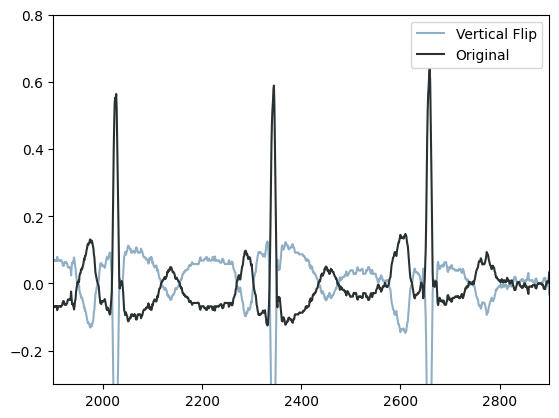

In [8]:
transformed = vertical_flip(ecg_example_lead)
plot_signal_transformation(ecg_example_lead, transformed, 'Vertical Flip')

<h3>Horizontal Flip</h3>

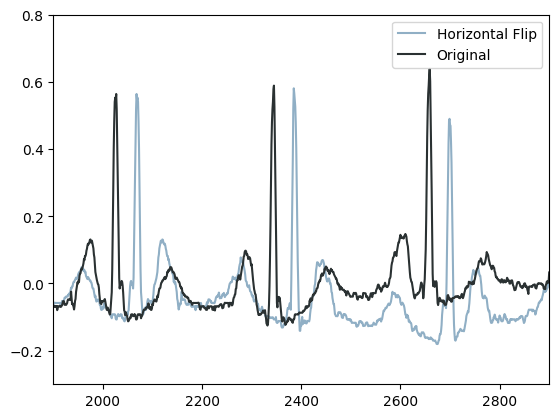

In [9]:
transformed = horizontal_flip(ecg_example_lead)
plot_signal_transformation(ecg_example_lead, transformed, 'Horizontal Flip')

<h3>Permutation</h3>

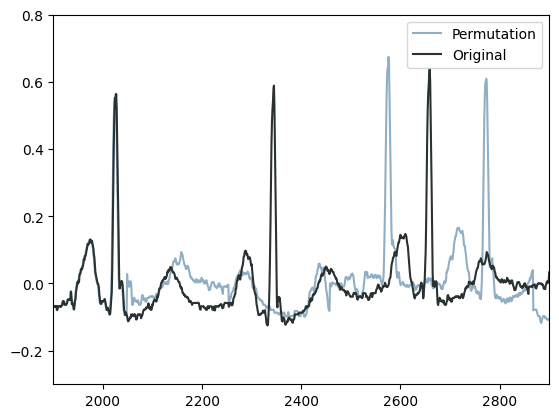

In [11]:
transformed = permutation(ecg_example_lead)
plot_signal_transformation(ecg_example_lead, transformed, 'Permutation')

<h3>Random combination</h3>

baseline; endpoint: 20;  amplitude: 0.04827718184230394; phase_shift: 0.4864309436973129
scaling; scaling factor: 0.2642921876865888


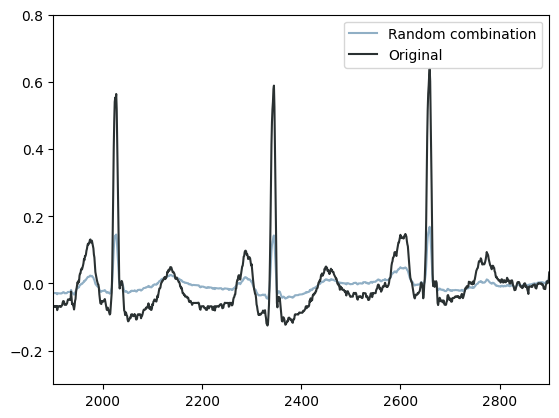

In [12]:
trans_types = [BASELINE, SCALING, GAUSS, NONE]

transformed = ecg_example.T
for t in trans_types:
    transformed = transform_signal(transformed, t)

plot_signal_transformation(ecg_example_lead, transformed.T[lead], 'Random combination')